# Spotify liked song clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

In [2]:
data = pd.read_json("./data/spotify-liked-songs.json")

## Data cleaning

In [3]:
df = data[['explicit', 'danceability', 'energy', 'loudness', 
           'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

df.head()

,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,False,0.728,0.612,-10.106,0.0499,0.09410,0.18800,0.3990,0.437
1,False,0.503,0.935,-7.693,0.0368,0.06060,0.83100,0.1340,0.626
2,True,0.204,0.886,-2.032,0.0662,0.11300,0.00450,0.3500,0.157
3,False,0.655,0.971,-2.665,0.0833,0.00897,0.00005,0.0771,0.660
4,False,0.527,0.949,-4.204,0.0441,0.00234,0.82900,0.1060,0.265


In [4]:
df.explicit = df.explicit.astype(int)
df.head()

/Users/marvinkome/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0,0.728,0.612,-10.106,0.0499,0.09410,0.18800,0.3990,0.437
1,0,0.503,0.935,-7.693,0.0368,0.06060,0.83100,0.1340,0.626
2,1,0.204,0.886,-2.032,0.0662,0.11300,0.00450,0.3500,0.157
3,0,0.655,0.971,-2.665,0.0833,0.00897,0.00005,0.0771,0.660
4,0,0.527,0.949,-4.204,0.0441,0.00234,0.82900,0.1060,0.265


In [5]:
from sklearn import preprocessing
minmaxScaler = preprocessing.MinMaxScaler()

In [8]:
loudness = df["loudness"].values
df["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))

<ipython-input-8-acf0736ece93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))


In [9]:
df.head()

,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0,0.728,0.612,0.427254,0.0499,0.09410,0.18800,0.3990,0.437
1,0,0.503,0.935,0.598425,0.0368,0.06060,0.83100,0.1340,0.626
2,1,0.204,0.886,1.000000,0.0662,0.11300,0.00450,0.3500,0.157
3,0,0.655,0.971,0.955097,0.0833,0.00897,0.00005,0.0771,0.660
4,0,0.527,0.949,0.845925,0.0441,0.00234,0.82900,0.1060,0.265


### PCA

In [23]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=9)
pcaData = pca.fit_transform(df)

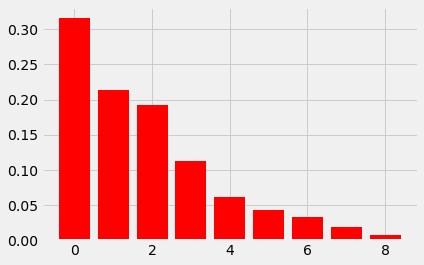

In [56]:
f = range(pca.n_components)
plt.bar(f, pca.explained_variance_ratio_, color='red')

pca_data = pd.DataFrame(pcaData)

In [57]:
pca_data.head()

,0,1,2,3,4,5,6,7,8
0,0.092354,0.001238,-0.093391,-0.064933,-0.241077,0.063921,0.213952,0.082604,-0.009311
1,0.391764,-0.509811,0.099151,0.294934,0.014164,0.017771,-0.132427,0.071183,-0.022038
2,-0.381083,0.093557,1.021761,-0.195418,0.268257,0.198240,0.093029,-0.002508,-0.023466
3,-0.399769,-0.267386,-0.069591,0.063320,0.169436,-0.177380,-0.002176,0.019699,0.023686
4,0.408873,-0.603045,0.250291,0.024941,0.175172,-0.159360,0.022373,-0.029644,-0.001274


Text(0, 0.5, 'Second component')

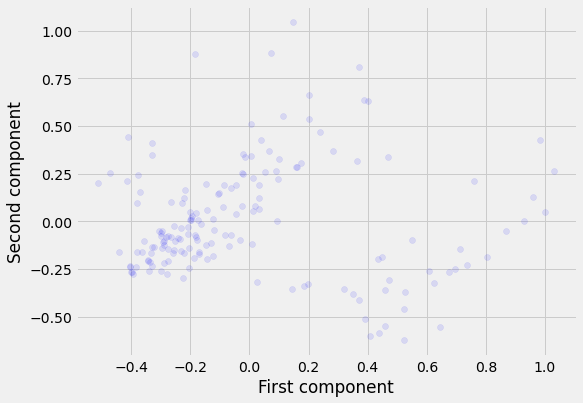

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[0], pca_data[1], c='blue', alpha=.1)

plt.xlabel('First component')
plt.ylabel('Second component')

## Model

Text(0, 0.5, 'SSE')

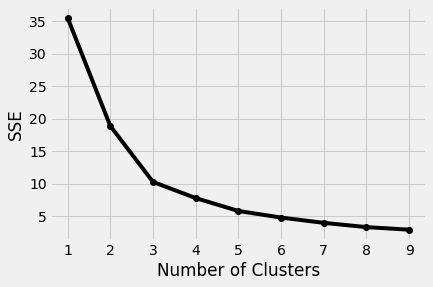

In [59]:
from sklearn.cluster import KMeans

ks = range(1, 10)
sse = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_data.iloc[:, :2])
    sse.append(kmeans.inertia_)
    
# plt.style.use("fivethirtyeight")
plt.plot(ks, sse, '-o', color='black')
plt.xticks(ks)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

In [129]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data.iloc[:, :2])

KMeans(n_clusters=3)

In [130]:
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [131]:
data['predCol'] = kmeans.labels_

In [132]:
ex = data[['predCol', 'name', 'artist', 'danceability', 'energy', 'loudness', 
           'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

In [156]:
col1 = ex[ex.predCol == 0]
col2 = ex[ex.predCol == 1]
col3 = ex[ex.predCol == 2]

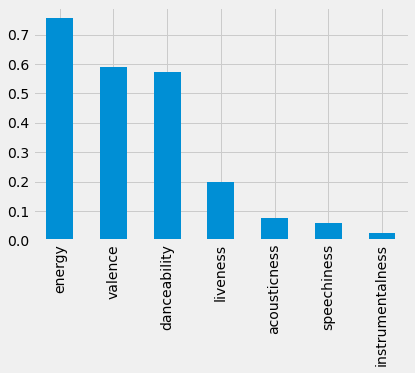

In [157]:
col1[['danceability', 'energy', 'speechiness', 
      'acousticness', 'instrumentalness', 'liveness', 'valence']].mean().sort_values(ascending=False).plot(kind='bar')

In [159]:
col1.head(10)

,predCol,name,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0,The Warning,Hot Chip,0.728,0.612,-10.106,0.0499,0.09410,0.188000,0.3990,0.4370
2,0,dogs,Nouns,0.204,0.886,-2.032,0.0662,0.11300,0.004500,0.3500,0.1570
3,0,That’s All It Is,The Snuts,0.655,0.971,-2.665,0.0833,0.00897,0.000050,0.0771,0.6600
5,0,Saturnine,Mystery Jets,0.464,0.561,-5.808,0.0272,0.03390,0.000507,0.1520,0.3070
11,0,Beach Comber,Real Estate,0.392,0.835,-6.553,0.0596,0.08320,0.009820,0.0769,0.1200
13,0,Car,Porches,0.559,0.687,-5.874,0.0433,0.07150,0.004490,0.2080,0.5410
15,0,Tic,No Buses,0.517,0.911,-5.496,0.0544,0.22000,0.002760,0.3500,0.7560
17,0,City Blues,The Walters,0.445,0.722,-4.624,0.0381,0.03850,0.098400,0.1660,0.3620
19,0,Chill,Bakar,0.556,0.455,-8.417,0.0594,0.02010,0.000004,0.1280,0.0915
23,0,Worn / Wander,Vundabar,0.342,0.852,-7.872,0.0513,0.00535,0.033700,0.2920,0.7710


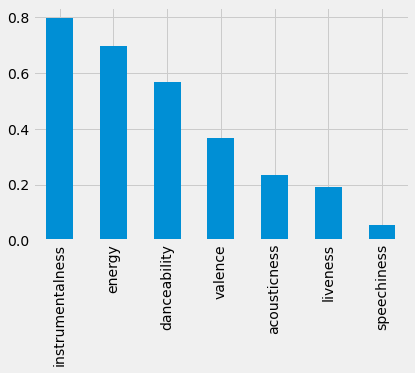

In [152]:
col2[['danceability', 'energy', 'speechiness', 
      'acousticness', 'instrumentalness', 'liveness', 'valence']].mean().sort_values(ascending=False).plot(kind='bar')

In [154]:
col2.head()

,predCol,name,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
1,1,Annie Blue,LAUNDER,0.503,0.935,-7.693,0.0368,0.06060,0.831,0.1340,0.6260
4,1,Hypnagogic (I Can't Wait),"Love Regenerator,Calvin Harris",0.527,0.949,-4.204,0.0441,0.00234,0.829,0.1060,0.2650
6,1,Vinta,Crumb,0.326,0.728,-8.264,0.0434,0.01260,0.485,0.2370,0.5060
9,1,Кафе для дураков (Remastered),Buerak,0.560,0.926,-5.742,0.0734,0.07060,0.851,0.4380,0.3300
10,1,Zion,Fluke,0.601,0.900,-6.781,0.0578,0.01250,0.936,0.0847,0.0394


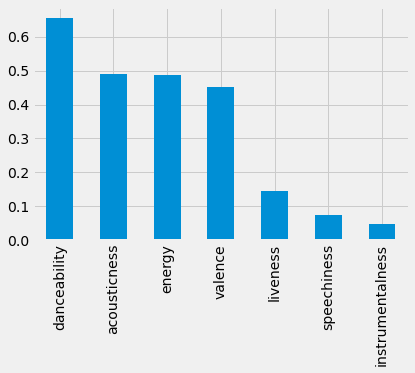

In [153]:
col3[['danceability', 'energy', 'speechiness', 
      'acousticness', 'instrumentalness', 'liveness', 'valence']].mean().sort_values(ascending=False).plot(kind='bar')

In [155]:
col3.head()

,predCol,name,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
7,2,anemone,slenderbodies,0.854,0.631,-8.197,0.0452,0.884,0.00999,0.2020,0.609
8,2,Best Worst Year,Strabe,0.707,0.706,-9.423,0.0664,0.344,0.01020,0.0938,0.594
18,2,Small Town Girl,Bakar,0.814,0.520,-5.651,0.0418,0.832,0.00000,0.2730,0.734
20,2,Stop Selling Her Drugs (feat. Dominic Fike),"Bakar,Dominic Fike",0.847,0.275,-6.440,0.1130,0.607,0.00000,0.0737,0.764
21,2,Hell N Back,Bakar,0.584,0.684,-4.314,0.5670,0.312,0.00009,0.1120,0.720
